Support Vector Machine Classification

## Adult Dataset

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

In [ ]:
df = pd.read_csv('sample_data/adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
df.shape

(48842, 15)

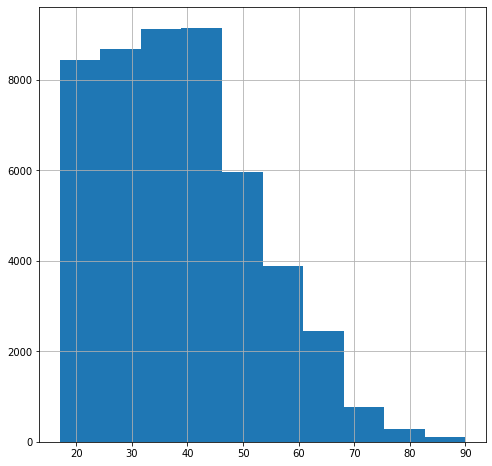

In [ ]:
df['age'].hist(figsize=(8,8))
plt.show()

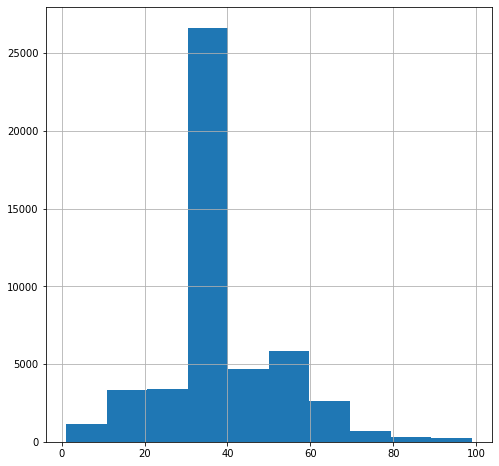

In [ ]:
df['hours-per-week'].hist(figsize=(8,8))
plt.show()

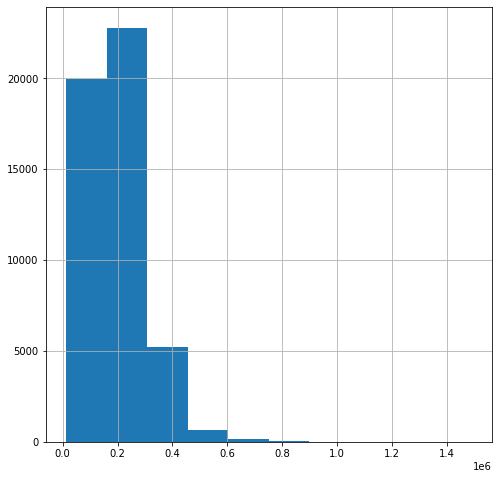

In [ ]:
df['fnlwgt'].hist(figsize=(8,8))
plt.show()

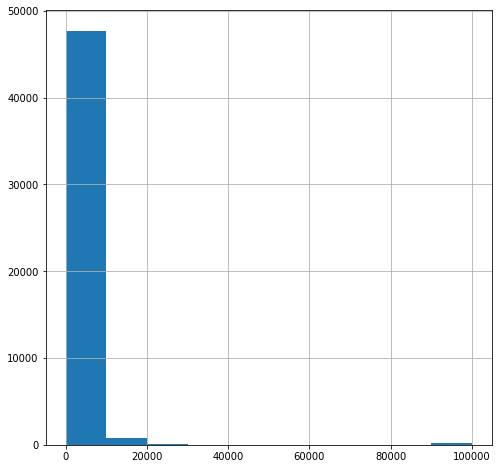

In [ ]:
df["capital-gain"].hist(figsize=(8,8))
plt.show()

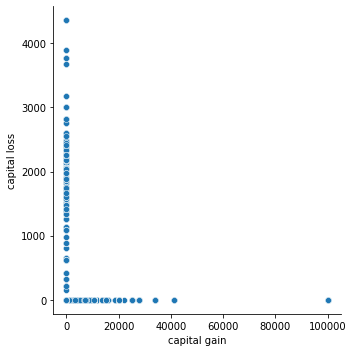

In [ ]:
sns.relplot('capital-gain','capital-loss', data= df)
plt.xlabel("capital gain")
plt.ylabel("capital loss")
plt.show()

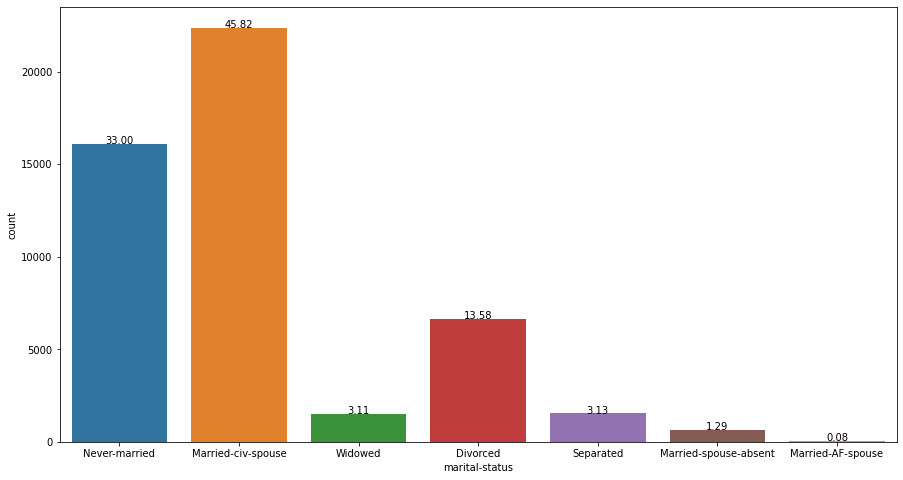

In [ ]:
plt.figure(figsize=(15,8))
total = float(len(df) )

ax = sns.countplot(x="marital-status", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

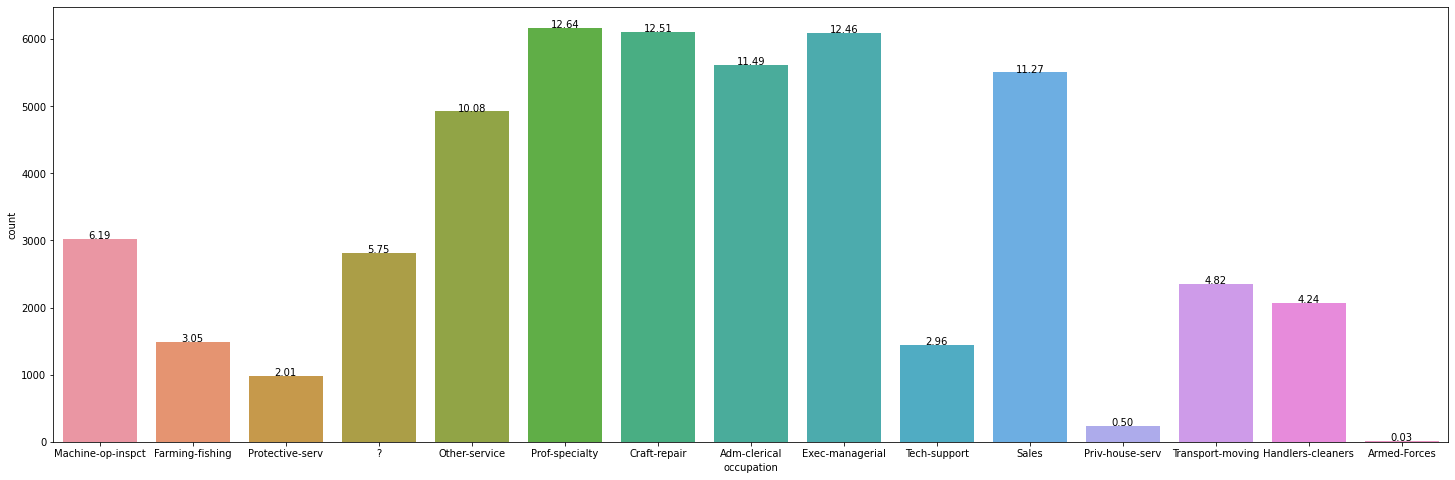

In [ ]:
plt.figure(figsize=(25,8))
total = float(len(df) )

ax = sns.countplot(x="occupation", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

In [ ]:
attrib, counts = np.unique(df['workclass'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
df['workclass'][df['workclass'] == '?'] = most_freq_attrib 

attrib, counts = np.unique(df['occupation'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
df['occupation'][df['occupation'] == '?'] = most_freq_attrib 

most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
df['native-country'][df['native-country'] == '?'] = most_freq_attrib

In [ ]:

df['income']=df['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0


In [ ]:
# make the age variable discretized 
df['age_bin'] = pd.cut(df['age'], 20)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
df = df.apply(LabelEncoder().fit_transform)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,age_bin
0,8,3,19329,1,6,4,6,3,2,1,0,0,39,39,0,2
1,21,3,4212,11,8,2,4,0,4,1,0,0,49,39,0,5
2,11,1,25340,7,11,2,10,0,4,1,0,0,39,39,1,3
3,27,3,11201,15,9,2,6,0,2,1,98,0,39,39,1,7
4,1,3,5411,15,9,4,9,3,4,0,0,0,29,39,0,0


In [ ]:
df['predclass'] = df['income']
del df['income']
df['education-num'] = df['educational-num']
del df['educational-num']

In [ ]:
drop_elements = ['education', 'native-country', 'predclass', 'age_bin']
y = df["predclass"]
X = df.drop(drop_elements, axis=1)
X.head()

,age,workclass,fnlwgt,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,education-num
0,8,3,19329,4,6,3,2,1,0,0,39,6
1,21,3,4212,2,4,0,4,1,0,0,49,8
2,11,1,25340,2,10,0,4,1,0,0,39,11
3,27,3,11201,2,6,0,2,1,98,0,39,9
4,1,3,5411,4,9,3,4,0,0,0,29,9


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)

In [ ]:
from sklearn import svm
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_train, y_train)
score_svm = clf.score(X_test,y_test)
print('The accuracy of the SVM ovo is', score_svm)

The accuracy of the SVM ovo is 0.7650731907052922


In [ ]:
lin_clf = svm.LinearSVC()
lin_clf.fit(X_train, y_train)
score_lin_svm = lin_clf.score(X_test,y_test)
print('The accuracy of the Linear SVM ovo is', score_lin_svm)

The accuracy of the Linear SVM ovo is 0.7587265840925376


In [ ]:
rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.fit(X_train, y_train)
score_rbf_svm = rbf_svc.score(X_test,y_test)
print('The accuracy of the Linear SVM RBF is', score_rbf_svm)

The accuracy of the Linear SVM RBF is 0.7650731907052922
